### Context

In this project, we will be analyzing the House Prices dataset. This dataset contains 79 explanatory variables and one target variable, which is the sale price of houses in Ames, Iowa. The purpose of this notebook is to predict the sale price of houses based on the given explanatory variables. The dataset is divided into a training set and a test set.

Our task will be to analyze the data, perform data preparation techniques to clean and preprocess the data, and then perform a regression analysis to create a model that can accurately predict the sale prices of houses. We will be using various machine learning algorithms and techniques to create and train our regression model.

### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings("ignore")

### Data reading

In [2]:
# reading the dataset
train = pd.read_csv('./house-prices-advanced-regression-techniques/train.csv')

In [3]:
train.shape

(1460, 81)

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [6]:
# drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### EDA

In the following section, we will be performing an exploratory data analysis (EDA) to uncover hidden trends in the dataset and take a deep dive into its features. EDA helps to better understand the data by identifying patterns, relationships, and anomalies. During this stage, we will visualize the data using various graphs and charts, such as scatterplots, histograms, and boxplots. We will also conduct statistical analyses to gain insights into the data and identify potential areas for further investigation.

#### Statistical analysis

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


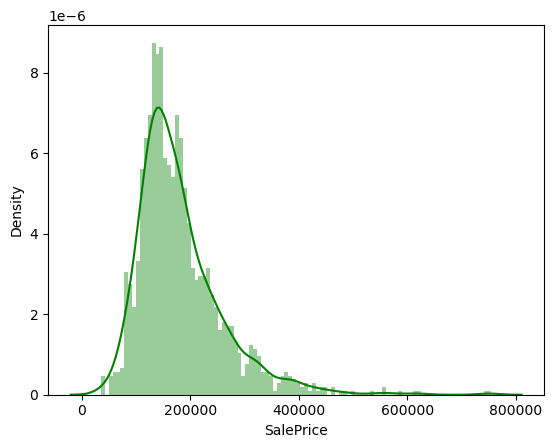

In [8]:
print(train['SalePrice'].describe())
sns.distplot(train['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

Based on the analysis, it appears that the prices in the dataset are skewed towards the left, and there are several outliers present that lie above the threshold of approximately 500,000. In order to achieve a normal distribution of the independent variable, SalePrice, which is essential for machine learning, it will be necessary to remove these outliers.

In [9]:
df_num = train.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


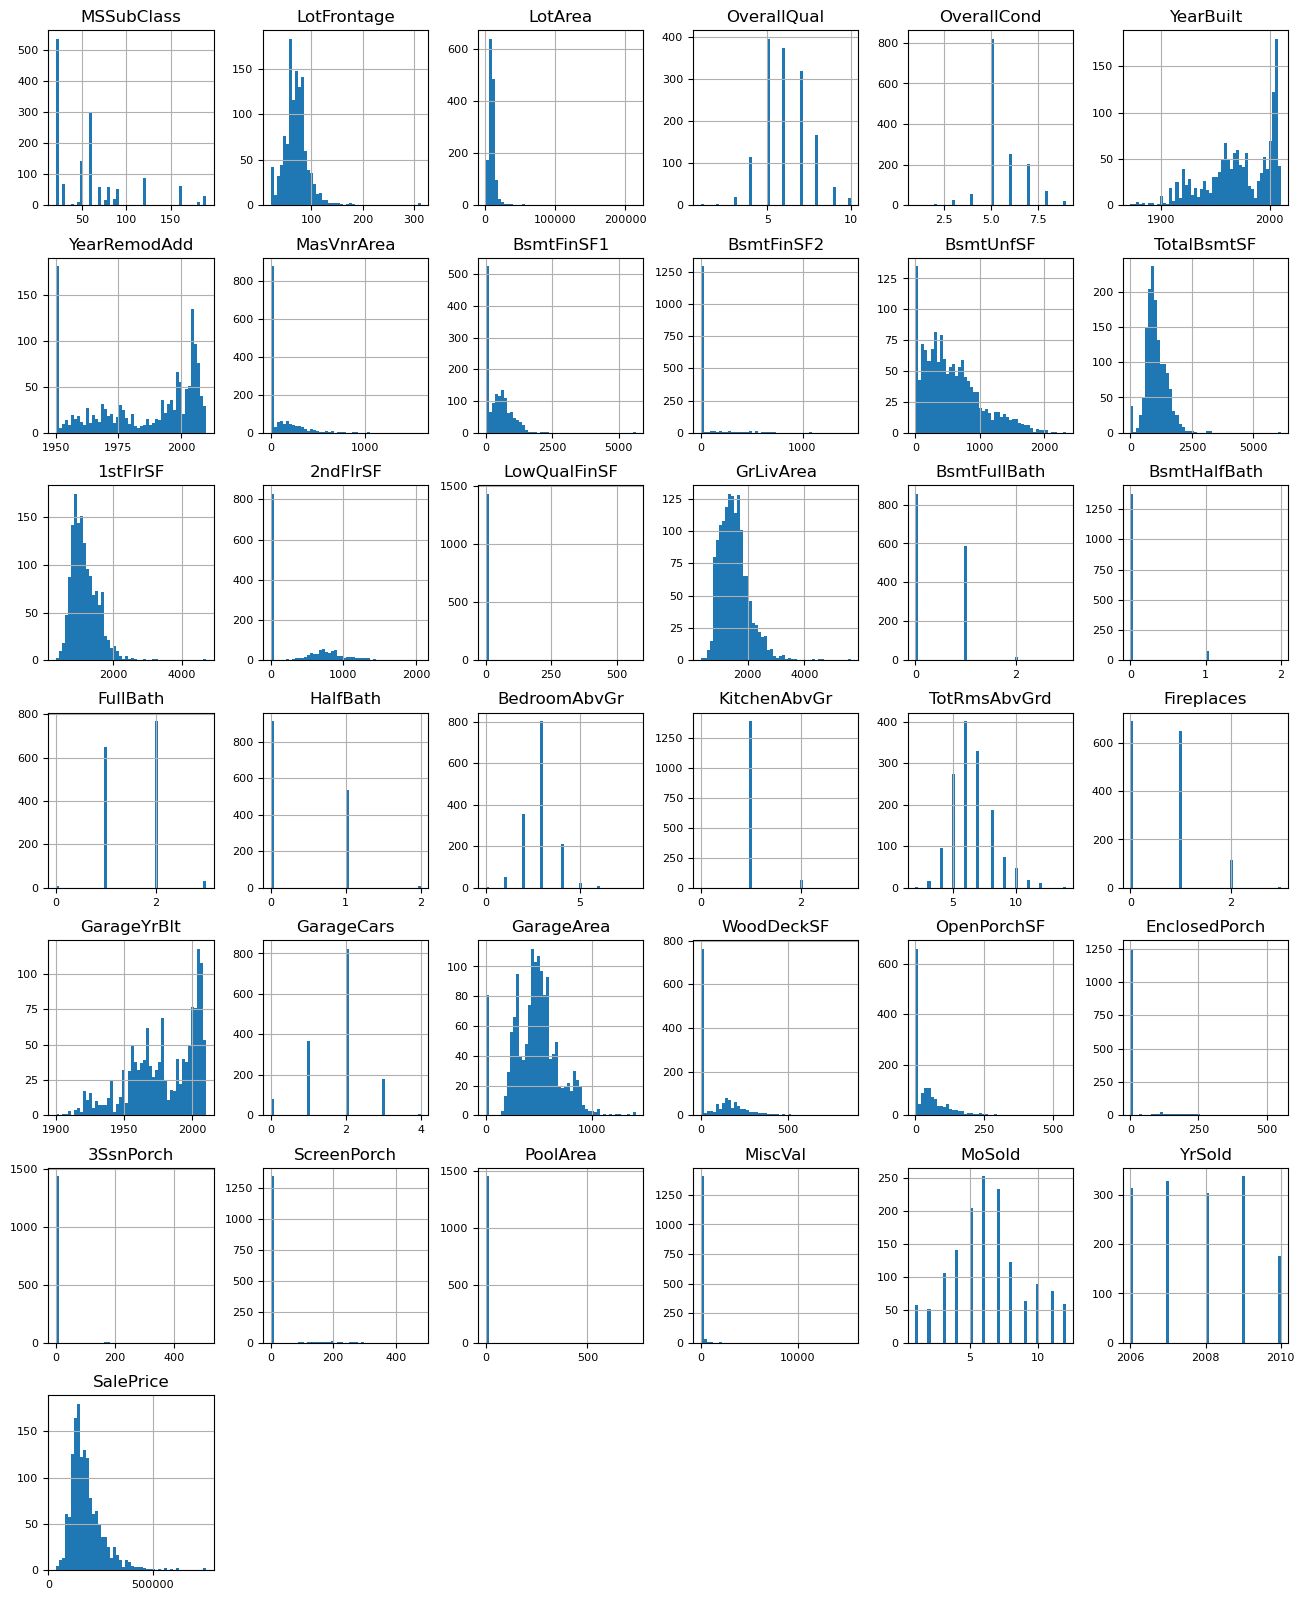

In [10]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

It is worth noting that features such as 1stFlrSF, TotalBsmtSF, LotFrontage, and GrLivArea seem to share a similar distribution to the one we have observed with the SalePrice. This indicates that we may encounter the same problem of right-skewedness and outliers with these features as well. Therefore, it is important to address this issue to obtain a normal distribution of the independent variables for machine learning. By doing so, we can avoid the model being heavily influenced by the outliers and achieve better predictive performance. Additionally, it is also important to note that examining the distribution of the other features can help us to identify trends or patterns that may be hidden in the data, which can ultimately improve our understanding of the underlying factors that affect the SalePrice.

#### Correlation

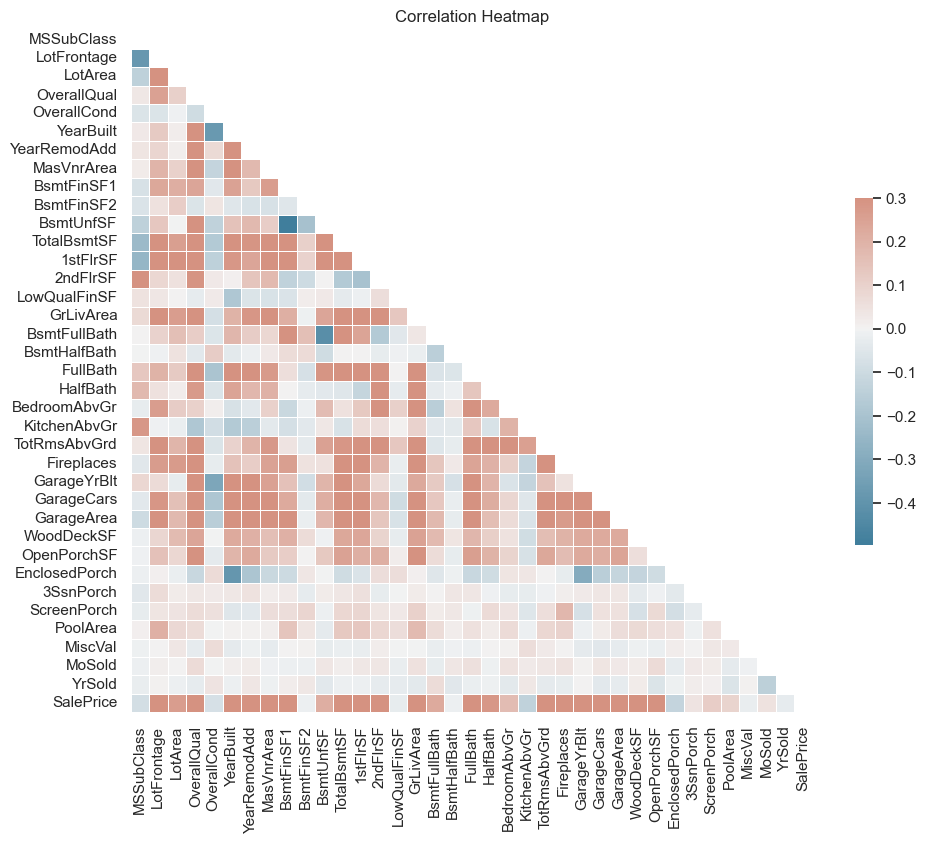

In [11]:
# calculate the correlation matrix
corr = df_num.corr()

# plot the correlation heatmap
sns.set(style="white")
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap')
plt.show()

After plotting the correlation matrix, we can see that some variables are highly correlated with the target variable, SalePrice. For example, OverallQual has a correlation coefficient of 0.79, GrLivArea has a correlation coefficient of 0.71, GarageCars has a correlation coefficient of 0.64, GarageArea has a correlation coefficient of 0.62, and TotalBsmtSF has a correlation coefficient of 0.61. These variables might be good candidates for our predictive model, as they show a strong linear relationship with SalePrice.

#### Quantitative analysis

Let's now analyze the quantitative features of our dataframe and how they relate to the SalePrice, which is also quantitative.

Some of the features in our dataset are categorical, while others are quantitative. To separate the categorical features from the quantitative ones, we can refer to the data_description.txt file. According to this file, we can identify the following columns as quantitative:

In [12]:
quantitative_features_list = ['LotFrontage', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF',
    '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'SalePrice']
df_quantitative_values = train[quantitative_features_list]
df_quantitative_values.head()

,LotFrontage,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,SalePrice
0,65.0,0,856,856,854,0,1710,1,208500
1,80.0,0,1262,1262,0,0,1262,0,181500
2,68.0,0,920,920,866,0,1786,1,223500
3,60.0,0,756,961,756,0,1717,1,140000
4,84.0,0,1145,1145,1053,0,2198,1,250000


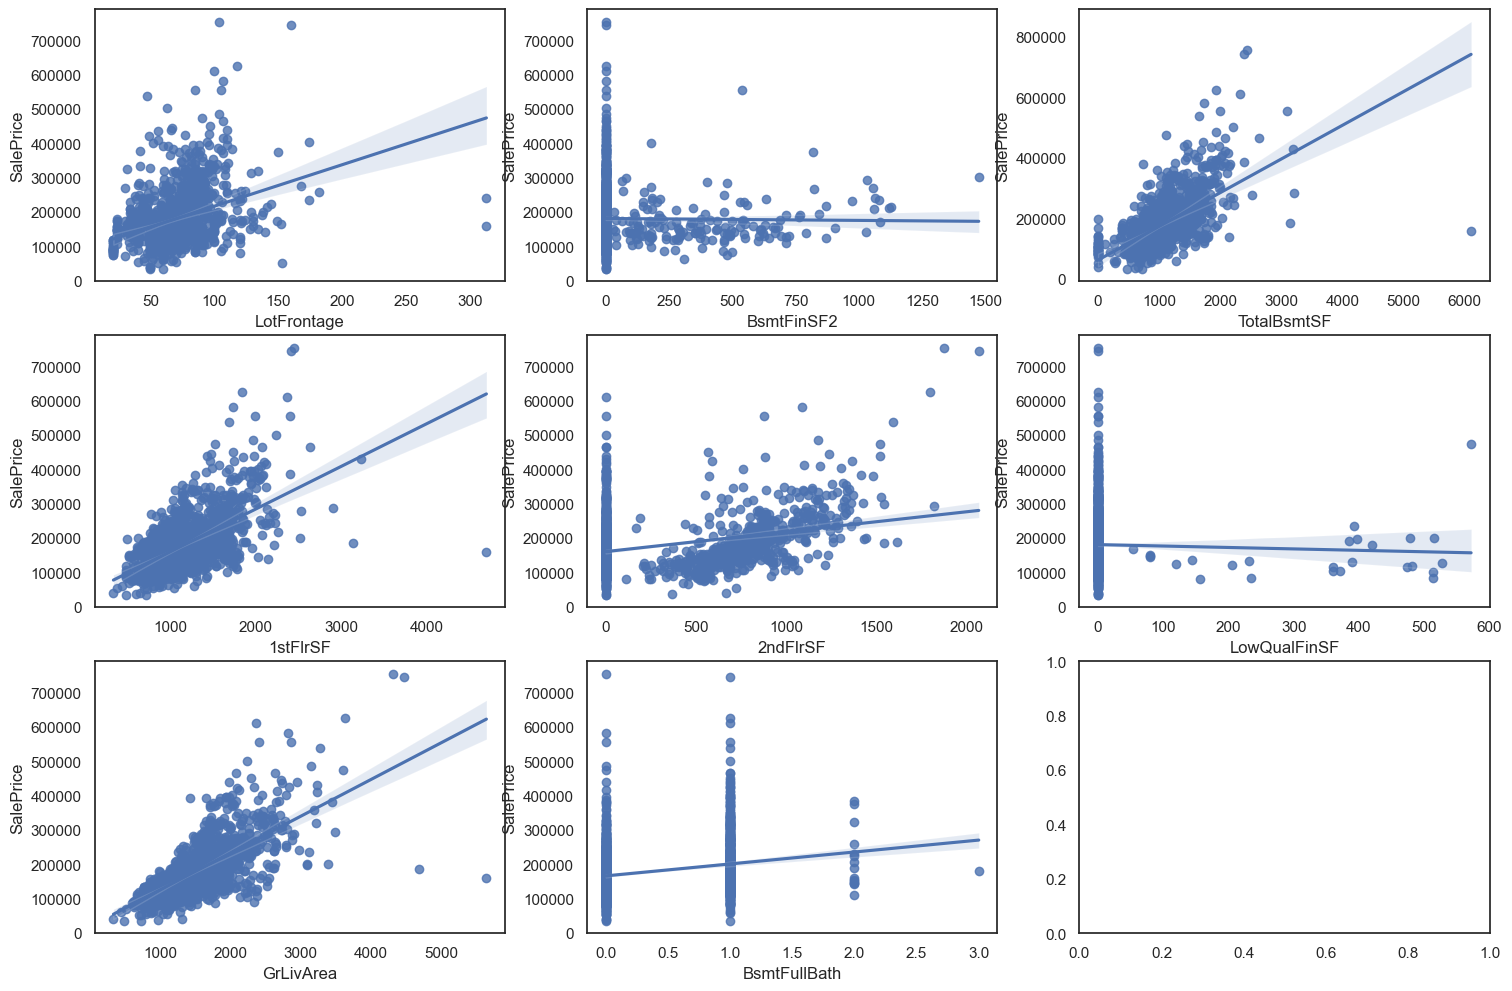

In [13]:
fig, ax = plt.subplots(round(len(quantitative_features_list) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(quantitative_features_list) - 1:
        sns.regplot(x=quantitative_features_list[i],y='SalePrice', data=train[quantitative_features_list], ax=ax)

After examining the quantitative features of our dataset, we can see that TotalBsmtSF and 1stFlrSF have a large spread of values. TotalBsmtSF ranges from 0 to 6110 square feet, while 1stFlrSF ranges from 334 to 4692 square feet. However, it's difficult to draw any meaningful insights from this information without additional context. For instance, we would need to compare these values with the median house prices in the area to determine if larger basement and first floor areas are indicative of higher home values.

### Data processing

#### Outliers

In this section, we will be coding the outliers analysis for our House Prices dataset. Outliers are observations that lie far away from the majority of the observations in the dataset and can significantly affect the accuracy of our model. Therefore, it is crucial to detect and handle outliers before building a regression model. In this section, we will be using various techniques to detect and visualize outliers in the dataset. We will remove the outliers from the dataset as they can have a significant impact on the model's performance and can cause instability in the regression coefficients.

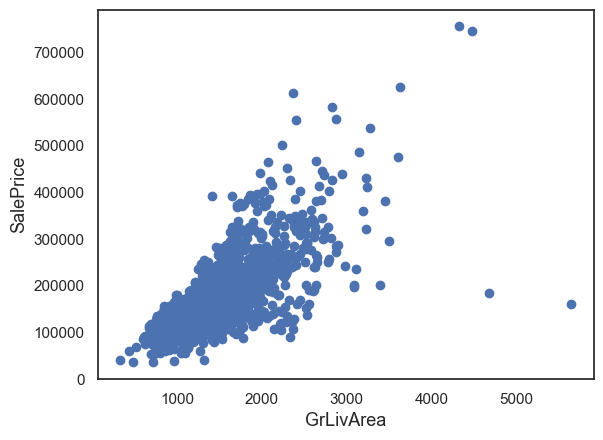

In [14]:
plt.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In the bottom right of the scatter plot of GrLivArea versus SalePrice, we can observe two data points that have an extremely high GrLivArea but a low SalePrice. These data points are clear outliers and their presence could negatively affect the accuracy of our model. Therefore, we can confidently remove these data points from our analysis to avoid any adverse impact on our model.

In [15]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#### Missing values

In [16]:
# Calculate percentage of missing values in each column
missing_percent = (train.isnull().sum() / train.isnull().count() * 100).sort_values(ascending=False)

# Filter out columns with no missing values
missing_percent = missing_percent[missing_percent > 0]

In [17]:
missing_percent

PoolQC          99.588477
MiscFeature     96.296296
Alley           93.758573
Fence           80.727023
FireplaceQu     47.325103
LotFrontage     17.764060
GarageYrBlt      5.555556
GarageCond       5.555556
GarageType       5.555556
GarageFinish     5.555556
GarageQual       5.555556
BsmtExposure     2.606310
BsmtFinType2     2.606310
BsmtCond         2.537723
BsmtQual         2.537723
BsmtFinType1     2.537723
MasVnrArea       0.548697
MasVnrType       0.548697
Electrical       0.068587
dtype: float64

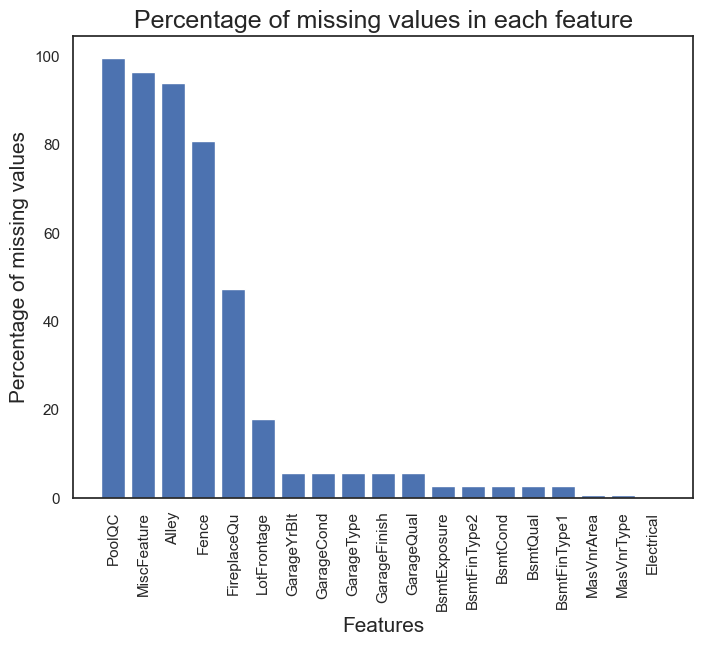

In [19]:
# Plot bar graph of missing values percentage
plt.figure(figsize=(8,6))
plt.xticks(rotation=90)
plt.bar(missing_percent.index, missing_percent.values)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percentage of missing values', fontsize=15)
plt.title('Percentage of missing values in each feature', fontsize=18)
plt.show()

we will drop all the columns that have missing values more than 10%. This is because having a large number of missing values in a column can make it difficult to draw meaningful conclusions from the data. By dropping these columns, we can ensure that our analysis is based on the most complete and accurate data possible. It also simplifies the data cleaning process, making it easier to work with the remaining columns.

In [20]:
# Detect numerical and categorical features
num_feats = train.select_dtypes(include=np.number).columns.tolist()
cat_feats = train.select_dtypes(exclude=np.number).columns.tolist()

# Fill missing values with median for numerical features
train[num_feats] = train[num_feats].fillna(train[num_feats].median())

# Fill missing values with mode for categorical features
train[cat_feats] = train[cat_feats].fillna(train[cat_feats].mode().iloc[0])

#### Label encoding

Label encoding is a way of converting categorical data into numerical form that can be used by machine learning algorithms. In label encoding, each unique category is assigned a numerical value starting from 0. Label encoding is important because machine learning algorithms work best with numerical data, and categorical data can't be directly used in most models.

In [21]:
# loop through each column
for col in train.columns:
    # check if column is categorical
    if train[col].dtype == 'object':
        # create a label encoder object and fit on the column
        le = LabelEncoder()
        le.fit(train[col].astype(str))
        # transform the column with the label encoder
        train[col] = le.transform(train[col].astype(str))

### Modeling

#### Train test split

In [22]:
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

In [23]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Model selection

In the model selection section, we will be performing model selection by trying out four different models on the training data. The aim is to compare the results of mean absolute error (MAE) and root mean squared error (RMSE) of these models and select the best-performing model for our dataset. The four models that we will be trying out are Lasso, Elastic Net, Kernel Ridge, and Gradient Boosting. The results of these models will help us identify the most effective model that can accurately predict the target variable for our dataset. By selecting the best-performing model, we can ensure that our model has the potential to perform well on the unseen test data as well.

In [24]:
# Fit the models and make predictions on the training data
lasso = Lasso(alpha=0.0005, random_state=42)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_train)

enet = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=42)
enet.fit(X_train, y_train)
y_pred_enet = enet.predict(X_train)

krr = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
krr.fit(X_train, y_train)
y_pred_krr = krr.predict(X_train)

gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt',
                                min_samples_leaf=15, min_samples_split=10, loss='huber', random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_train)

In [25]:
# Calculate the mean absolute error (MAE) and root mean squared error (RMSE) on the training data
mae = [mean_absolute_error(y_train, y_pred_lasso), mean_absolute_error(y_train, y_pred_enet),
       mean_absolute_error(y_train, y_pred_krr), mean_absolute_error(y_train, y_pred_gbr)]
rmse = [np.sqrt(mean_squared_error(y_train, y_pred_lasso)), np.sqrt(mean_squared_error(y_train, y_pred_enet)),
        np.sqrt(mean_squared_error(y_train, y_pred_krr)), np.sqrt(mean_squared_error(y_train, y_pred_gbr))]

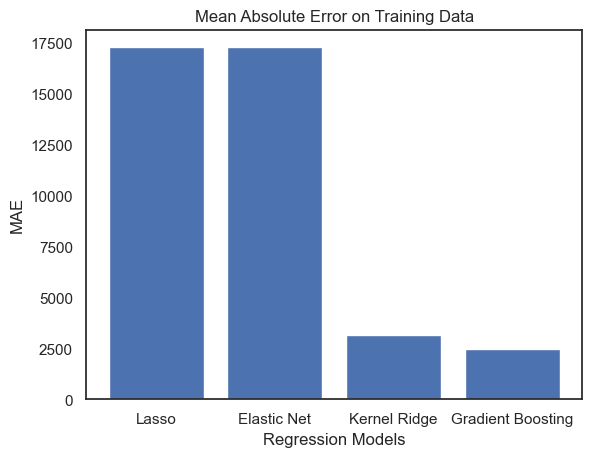

In [26]:
# Plot the results
models = ['Lasso', 'Elastic Net', 'Kernel Ridge', 'Gradient Boosting']
plt.bar(models, mae)
plt.title('Mean Absolute Error on Training Data')
plt.xlabel('Regression Models')
plt.ylabel('MAE')
plt.show()

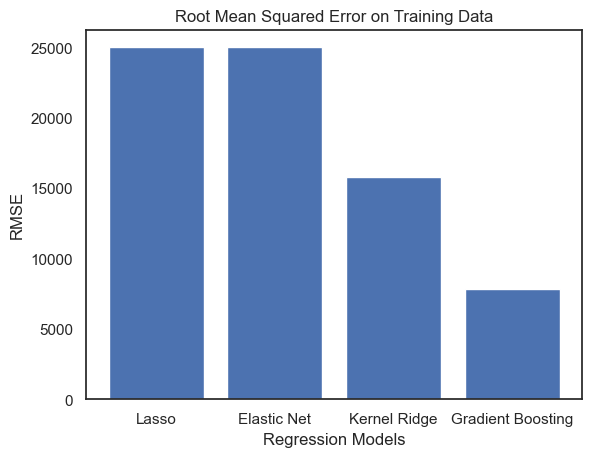

In [27]:
# Plot the results
models = ['Lasso', 'Elastic Net', 'Kernel Ridge', 'Gradient Boosting']
plt.bar(models, rmse)
plt.title('Root Mean Squared Error on Training Data')
plt.xlabel('Regression Models')
plt.ylabel('RMSE')
plt.show()

#### Final Model

In the final model section, we will use gradient boosting as our final model as it had the best results over all the other models during the model selection phase. We will fit the gradient boosting model on the entire training data and make predictions on the testing data. We will report the results on mean absolute error (MAE) and root mean squared error (RMSE) to evaluate the performance of the model. Additionally, we will also create some plots to visually analyze the quality of our model predictions.

In [28]:
# Make predictions on the testing dataset
y_pred = gbr.predict(X_test)

# Evaluate the performance of the model using MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 14619.14
RMSE: 20885.83


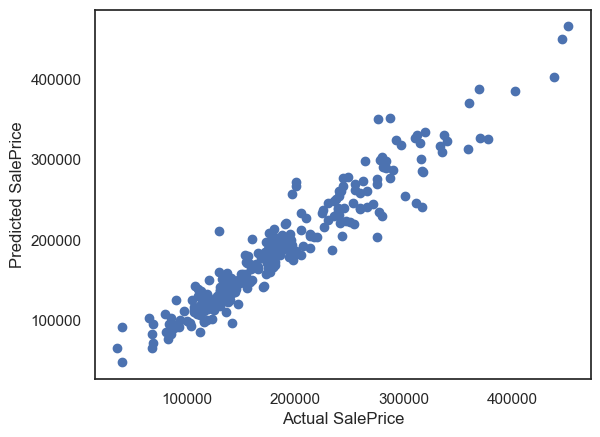

In [29]:
import matplotlib.pyplot as plt

# Plot actual vs predicted SalePrice
plt.scatter(y_test, y_pred)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.show()

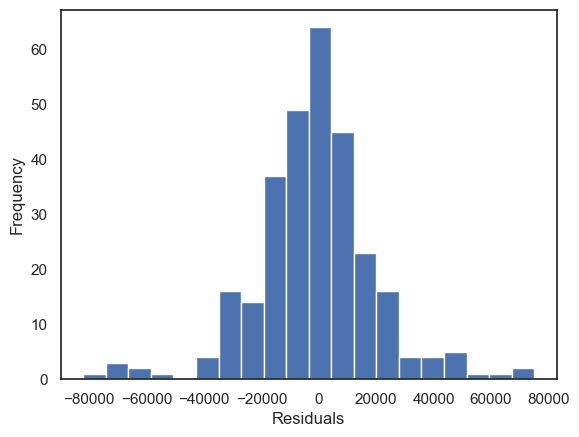

In [30]:
# Plot the distribution of residuals
residuals = y_test - y_pred
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

Based on the analysis of the gradient boosting model on the testing data, the model is performing well in making predictions for house prices. The residuals plot shows a random distribution with no clear pattern, which indicates that the model is capturing the underlying relationships in the data well. The scatter plot also shows that the predicted values are aligned with the actual values, indicating that the model is making good predictions.

The final model has an MAE of 14619.14 and an RMSE of 20885.83 on the testing data, which is a good performance for predicting house prices.